**AdaBoost was the first really successful boosting algorithm developed for binary classification. It is the best starting point for understanding boosting.**

**AdaBoost is best used to boost the performance of decision trees on binary classification problems.**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
df =  pd.read_csv('credit-card-default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop('defaulted',axis=1)
y = df.defaulted

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

In [8]:
rfc = RandomForestClassifier(max_depth=2,random_state=101)

In [10]:
rfc.fit(X_train,y_train)

/home/ajay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [11]:
rfc_pred = rfc.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [13]:
print(classification_report(rfc_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      9351
           1       0.18      0.69      0.28       549

   micro avg       0.80      0.80      0.80      9900
   macro avg       0.58      0.75      0.58      9900
weighted avg       0.93      0.80      0.85      9900



In [14]:
print(confusion_matrix(rfc_pred,y_test))

[[7574 1777]
 [ 168  381]]


In [15]:
print(accuracy_score(rfc_pred,y_test))

0.8035353535353535


**Using ADA BOOSTING**

In [16]:
estimator  =  list(range(1,50,3))
ada_scores = []

In [18]:
for n_estimators in estimator:
    ada = AdaBoostClassifier(base_estimator=rfc,n_estimators=n_estimators)
    ada.fit(X_train,y_train)
    y_pred = ada.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    ada_scores.append(score)

In [19]:
ada_scores

[0.806060606060606,
 0.8174747474747475,
 0.8196969696969697,
 0.8182828282828283,
 0.8176767676767677,
 0.8178787878787879,
 0.8172727272727273,
 0.8174747474747475,
 0.8178787878787879,
 0.8188888888888889,
 0.8204040404040404,
 0.8194949494949495,
 0.8204040404040404,
 0.8198989898989899,
 0.8207070707070707,
 0.8192929292929293,
 0.8197979797979797]

Text(0, 0.5, 'ada boost score accuracy')

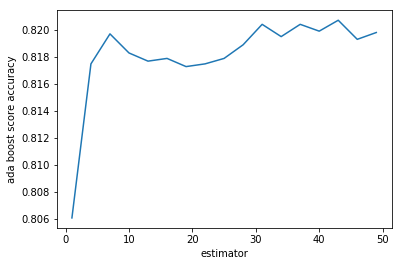

In [20]:
plt.figure()
plt.plot(estimator,ada_scores)
plt.xlabel('estimator')
plt.ylabel('ada boost score accuracy')
